<a href="https://colab.research.google.com/github/Greg9998/Demo111/blob/master/HARP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
# clear all
from IPython import get_ipython
get_ipython().magic('reset -sf')

Libraries, data read, preprocessing and subsets generation

In [97]:
import numpy as np # Library for matrix operations and numerical computations
import pandas as pd # Library for data manipulation and analysis, CSV file handling
import seaborn as sns # Library for creating attractive statistical plots
import matplotlib.pyplot as plt # Library for creating plots and data visualizatio
import warnings # Library for handling warnings and message
import sklearn.metrics # Library containing functions for evaluating machine learning model results
from sklearn.preprocessing import OrdinalEncoder # Library for encoding categorical variables
from sklearn.preprocessing import (MinMaxScaler, StandardScaler) # Library for data normalization and standardization
from sklearn.model_selection import train_test_split # Library for splitting data into training and testing sets

from sklearn.pipeline import make_pipeline # Library for creating data processing pipelines
from sklearn.metrics import confusion_matrix #Library for confusion matrix to evaluate the accuracy
from sklearn.model_selection import cross_validate # Library for conducting cross-validation
from sklearn.datasets import make_circles, make_classification, make_moons # Library for generating artificial data for model testing
from sklearn.model_selection import GridSearchCV # Library for grid search of model hyperparameters

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis # Implementation of Quadratic Discriminant Analysis in scikit-learn
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier #Implementations of AdaBoost and Random Forest algorithms
from sklearn.gaussian_process import GaussianProcessClassifier # Implementation of a classifier based on Gaussian Process
from sklearn.gaussian_process.kernels import RBF # Implementation of the RBF kernel function for Gaussian Process
from sklearn.inspection import DecisionBoundaryDisplay # Library for visualizing decision boundaries of models
from sklearn.naive_bayes import GaussianNB # Implementation of the Naive Bayes classification algorithm
from sklearn.neighbors import KNeighborsClassifier # Implementation of the k-nearest neighbors algorithm
from sklearn.neural_network import MLPClassifier # Implementation of the Multi-Layer Perceptron classifier
from sklearn.svm import SVC # Implementation of Support Vector Machine in scikit-learn
from sklearn.tree import DecisionTreeClassifier # Implementation of the decision tree classifier

#Settings the warnings to be ignored
warnings.filterwarnings('ignore')

#Read data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/heart_disease.csv')
data0 = data.copy()

#Descriptive statistics function
def summary(df):
    print('data shape: ',df.shape)
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['missing'] = df.isnull().sum().values
    summ['%miss'] = df.isnull().sum().values / len(df)
    summ['unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['Quant1'] = df.quantile(0.25)
    summ['median'] = df.quantile(0.5)
    summ['Quant3'] = df.quantile(0.75)
    summ['max'] = desc['max'].values
    summ['mean'] = df.mean()
    summ['std'] = df.std()
    summ['skew'] = df.skew()
    summ['kurt'] = df.kurt()
    return summ

#Missing values removal
data.dropna(inplace=True)

#Categorical replacement into int
## naturaly progression integers
enc = OrdinalEncoder(categories=[['uneducated','primaryschool','graduate','postgraduate']])
enc.fit(data[['education']])
data[['education']] = enc.transform(data[['education']])

## binary vals
enc = OrdinalEncoder()
enc.fit(data[['Gender','prevalentStroke','Heart_ stroke']])
data[['Gender','prevalentStroke','Heart_ stroke']] = enc.transform(data[['Gender','prevalentStroke','Heart_ stroke']])

#Outliers removal
outliersThreshold = 0.005

q_low = data.quantile(outliersThreshold)
q_hi = data.quantile(1-outliersThreshold)
logic = True
for col in data.columns:
  logic = logic & (data[col]<=q_hi[col]) & (data[col]>=q_low[col])
data2 = data[logic]

#delete unnecessary variables
del enc, col, logic, q_low, q_hi

#Train-test-validation split function
def train_test_valid_split(target,data,rTR=60,rTE=20,rVA=20):
  rTT=1-rTR/(rTR+rTE+rVA) #remaining fraction after train subset generation
  rTV=rTE/(rTE+rVA) #test vs validation subset fraction
  x_train, x_test, y_train, y_test = train_test_split(target, data, test_size=rTT, random_state=12)
  x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size=rTV, random_state=13)
  return x_train, x_test, x_valid, y_train, y_test, y_valid

#Split data2 into training, testing and validation subsets
## chosen features
xc = data2[['age', 'sysBP', 'diaBP', 'glucose']]
## extract target
x = data2.drop(['Heart_ stroke','age', 'sysBP','diaBP', 'glucose'], axis = 1)
xa = data2.drop(['Heart_ stroke'], axis = 1)
y = data2['Heart_ stroke']

#standardisation
standard_scaler = StandardScaler().set_output(transform="pandas")
x = standard_scaler.fit_transform(x)
xc = standard_scaler.fit_transform(xc)
xa = standard_scaler.fit_transform(xa)

## Split data2 (with 'c' - subsets with only chosen features)
xc_train, xc_test, xc_valid, yc_train, yc_test, yc_valid = train_test_valid_split(xc,y,80,10,10)
xa_train, xa_test, xa_valid, ya_train, ya_test, ya_valid = train_test_valid_split(xa,y,80,10,10)
x_train, x_test, x_valid, y_train, y_test, y_valid = train_test_valid_split(x,y,80,10,10)

#sklearn.metrics accuracy and precision print function
def sklmetrics(y_train,y_pred_train,y_valid,y_pred_valid):
  acc_train = sklearn.metrics.accuracy_score(y_train, y_pred_train)
  acc_valid = sklearn.metrics.accuracy_score(y_valid, y_pred_valid)
  prec_train = sklearn.metrics.precision_score(y_train, y_pred_train)
  prec_valid = sklearn.metrics.precision_score(y_valid, y_pred_valid)
  print(f'Train accuracy = {acc_train:.7f}\nValid accuracy = {acc_valid:.7f}')
  print(f'Train precision = {prec_train:.7f}\nValid precision = {prec_valid:.7f}')

summary(data2)

data shape:  (3441, 16)


,data type,missing,%miss,unique,min,Quant1,median,Quant3,max,mean,std,skew,kurt
Gender,float64,0,0.0,2,0.00,0.0,0.0,1.00,1.00,0.446382,0.497189,0.215811,-1.954562
age,int64,0,0.0,35,34.00,42.0,49.0,56.00,68.00,49.473409,8.445031,0.232585,-0.999850
education,float64,0,0.0,4,0.00,0.0,1.0,2.00,3.00,0.993316,1.027648,0.671072,-0.755260
currentSmoker,int64,0,0.0,2,0.00,0.0,0.0,1.00,1.00,0.487940,0.499927,0.048277,-1.998831
cigsPerDay,float64,0,0.0,29,0.00,0.0,0.0,20.00,43.00,8.880267,11.568535,1.090714,0.207265
BPMeds,float64,0,0.0,2,0.00,0.0,0.0,0.00,1.00,0.027027,0.162186,5.835878,32.076111
prevalentStroke,float64,0,0.0,2,0.00,0.0,0.0,0.00,1.00,0.005812,0.076027,13.007819,167.300589
prevalentHyp,int64,0,0.0,2,0.00,0.0,0.0,1.00,1.00,0.303110,0.459669,0.857160,-1.266013
diabetes,int64,0,0.0,2,0.00,0.0,0.0,0.00,1.00,0.021215,0.144121,6.648097,42.221730
totChol,float64,0,0.0,214,150.00,207.0,234.0,264.00,372.00,236.859924,41.526310,0.359809,-0.132466


In [81]:
#-----------------------------classification-----------------------------------
names = [
    "Nearest_Neighbors",
    "Linear_SVM",
    "RBF_SVM",
    #"Gaussian_Process",
    "Decision_Tree",
    "Random_Forest",
    "Neural_Net",
    "AdaBoost",
    "Naive_Bayes",
    "QDA",
]

rows = ["Mean_fit_time","Train score", "Train recall","Train accuracy","Train precision",
        "Valid score", "Valid recall","Valid accuracy","Valid precision"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=0.1, C=1, random_state=42, cache_size=2000, class_weight='balanced'),
    #GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, random_state=42),
    MLPClassifier(alpha=0.001, max_iter=1000, random_state=42),
    AdaBoostClassifier(random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

#Function for score, time, accuracy, precision and recall
def TotalRecall(clf,x_train,y_train,x_valid,y_valid,cv=3):
  y_pred_train = clf.predict(x_train)
  y_pred_valid = clf.predict(x_valid)
  clf_results = cross_validate(clf, x_train, y_train, cv=cv)
  return [
      (clf_results['fit_time']).mean(), #mean_fit_time
      clf.score(x_train, y_train), #Train score
      sklearn.metrics.recall_score(y_train, y_pred_train), #Train recall
      sklearn.metrics.accuracy_score(y_train, y_pred_train), #Train accuracy
      sklearn.metrics.precision_score(y_train, y_pred_train), #Train precision
      clf.score(x_valid, y_valid), #Valid score
      sklearn.metrics.recall_score(y_valid, y_pred_valid), #Valid recall
      sklearn.metrics.accuracy_score(y_valid, y_pred_valid), #Valid accuracy
      sklearn.metrics.precision_score(y_valid, y_pred_valid), #Valid precision
  ]

# iterate over classifiers for all data
scoreAll = pd.DataFrame([], index=rows, columns=names)
for name, clf in zip(names, classifiers):
  clf = make_pipeline(StandardScaler(), clf)
  clf.fit(x_train, y_train)
  scoreAll[name]=TotalRecall(clf,x_train,y_train,x_valid,y_valid,3)

scoreAll

KeyboardInterrupt: ignored

In [ ]:
# iterate over classifiers for XC data
scoreXC = pd.DataFrame([], index=rows, columns=names)
for name, clf in zip(names, classifiers):
  clf = make_pipeline(StandardScaler(), clf)
  clf.fit(xc_train, yc_train)
  scoreXC[name]=TotalRecall(clf,xc_train,yc_train,xc_valid,yc_valid,5)

scoreXC

,Nearest_Neighbors,Linear_SVM,RBF_SVM,Decision_Tree,Random_Forest,Neural_Net,AdaBoost,Naive_Bayes,QDA
Mean_fit_time,0.005090,0.022399,0.095988,0.015920,0.051210,1.705942,0.163208,0.004889,0.005098
Train score,0.884205,0.853682,0.862888,0.863857,0.861434,0.852713,0.857558,0.838178,0.840116
Train recall,0.377483,0.000000,0.062914,0.142384,0.052980,0.003311,0.052980,0.158940,0.102649
Train accuracy,0.884205,0.853682,0.862888,0.863857,0.861434,0.852713,0.857558,0.838178,0.840116
Train precision,0.690909,0.000000,1.000000,0.661538,1.000000,0.250000,0.666667,0.375000,0.344444
Valid score,0.811047,0.867733,0.863372,0.847384,0.866279,0.867733,0.861919,0.837209,0.843023
Valid recall,0.109890,0.000000,0.000000,0.054945,0.021978,0.000000,0.043956,0.142857,0.109890
Valid accuracy,0.811047,0.867733,0.863372,0.847384,0.866279,0.867733,0.861919,0.837209,0.843023
Valid precision,0.169492,0.000000,0.000000,0.208333,0.400000,0.000000,0.333333,0.276596,0.270270


Model implementation (parameters optimised)

In [98]:
# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix

from sklearn.neural_network import MLPClassifier # Implementation of the Multi-Layer Perceptron classifier
from sklearn.svm import SVC # Implementation of Support Vector Machine in scikit-learn

clfc = SVC(C=1, gamma=0.01, kernel = 'sigmoid', cache_size=2000, class_weight='balanced')
clfc.fit(xc_train, yc_train)

clfc2 = MLPClassifier(activation='relu', alpha=0.01, hidden_layer_sizes= (32, 64, 32, 8), learning_rate='constant', solver= 'lbfgs',
              max_iter = 20000, early_stopping = True, validation_fraction = 0.111, random_state=0)
clfc2.fit(xc_train, yc_train)

y_pred = clfc.predict(xc_test)
y_pred2 = clfc2.predict(xc_test)

print(classification_report(yc_test, y_pred))
print(classification_report(yc_test, y_pred2))

              precision    recall  f1-score   support

         0.0       0.95      0.65      0.77       301
         1.0       0.24      0.75      0.36        44

    accuracy                           0.66       345
   macro avg       0.59      0.70      0.57       345
weighted avg       0.86      0.66      0.72       345

              precision    recall  f1-score   support

         0.0       0.88      0.84      0.86       301
         1.0       0.16      0.20      0.18        44

    accuracy                           0.76       345
   macro avg       0.52      0.52      0.52       345
weighted avg       0.79      0.76      0.77       345



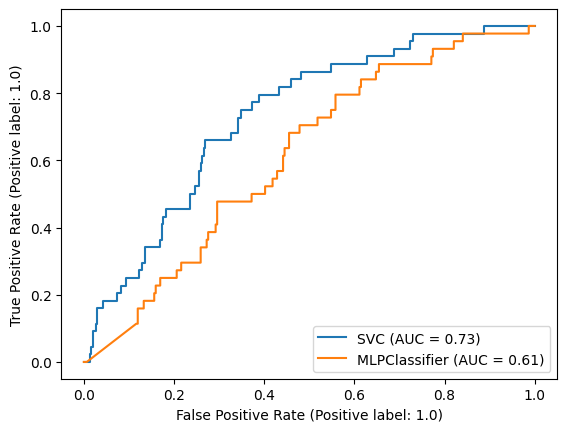

In [99]:
from sklearn.metrics import RocCurveDisplay
fig, ax = plt.subplots()
RocCurveDisplay.from_estimator(clfc,xc_test, yc_test, ax=ax, name=None)
RocCurveDisplay.from_estimator(clfc2,xc_test, yc_test, ax=ax, name=None)

<Axes: title={'center': 'Cross-validated classification metrics'}>

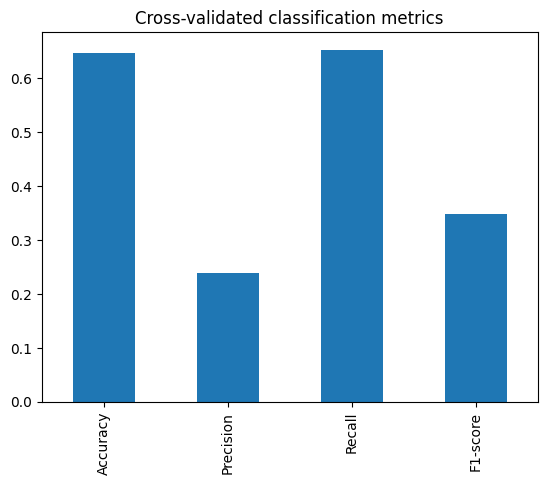

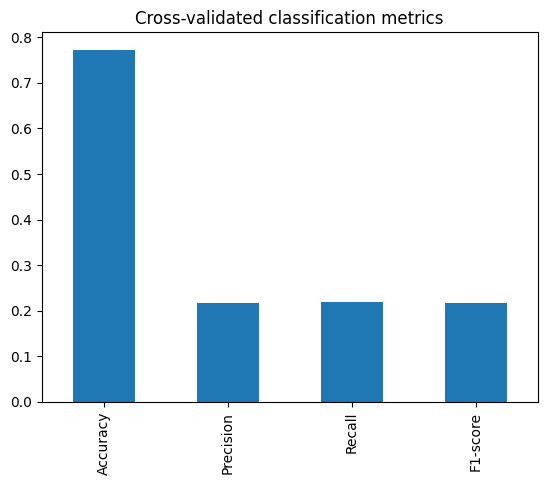

In [101]:
#metrics_function
def metrics_func(clf,x,y,cv=5):
  cv_acc = cross_val_score(clf,x,y,cv=cv,scoring='accuracy') # Cross-validated accuracy
  cv_precision = cross_val_score(clf,x,y,cv=cv,scoring='precision') # Cross-validated precision
  cv_recall = cross_val_score(clf,x,y,cv=cv,scoring='recall') # Cross-validated recall
  cv_f1 = cross_val_score(clf,x,y,cv=cv,scoring='f1') # Cross-validated f1
  cv_metrics = pd.DataFrame({'Accuracy':np.mean(cv_acc),
                             'Precision': np.mean(cv_precision),
                             'Recall' : np.mean(cv_recall),
                             'F1-score': np.mean(cv_f1)},index=[0])
  return cv_metrics

cv_metrics = metrics_func(clfc,xc_test, y_test,cv=3)
cv_metrics2 = metrics_func(clfc2,xc_test, y_test,cv=3)
cv_metrics.T.plot.bar(title="Cross-validated classification metrics",legend=False)
cv_metrics2.T.plot.bar(title="Cross-validated classification metrics",legend=False)


All features importance - summary

              precision    recall  f1-score   support

         0.0       0.98      0.64      0.77       301
         1.0       0.27      0.91      0.41        44

    accuracy                           0.67       345
   macro avg       0.62      0.77      0.59       345
weighted avg       0.89      0.67      0.73       345



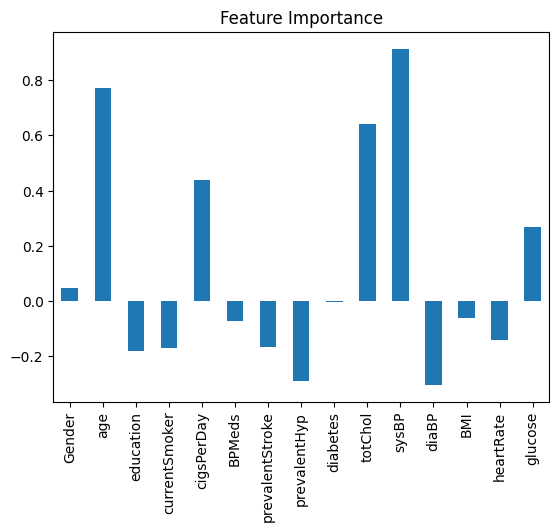

In [88]:
clfa = SVC(C=1000, gamma=0.1, kernel = 'linear', cache_size=2000, class_weight='balanced')
clfa.fit(xa_train, ya_train)

clfa.fit(xa_test, ya_test)
y_preda = clfa.predict(xa_test)

print(classification_report(ya_test, y_preda))

feature_dict = dict(zip(xa.columns, list(clfa.coef_[0])))
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);